<a href="https://colab.research.google.com/github/manju-patel/base/blob/master/cnn_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# gilt logo 
- python demo

![git logo](https://image.pngaaa.com/555/4725555-middle.png)

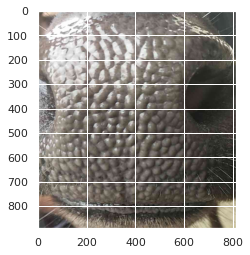

(891, 812, 3)

In [ ]:
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(color_codes=True)
#image_path='/content/gdrive/My Drive/pantech_solution/DL_data/muzzle_data/1/train/90018800169218/clh90018800169218_1.jpg'

image_path='/content/gdrive/My Drive/pantech_solution/DL_data/muzzle_data/raw_images/90088000186902_1.jpg'
# Read the image
image = cv2.imread(image_path) #--imread() helps in loading an image into jupyter including its pixel values    
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()
image.shape

Original Image:


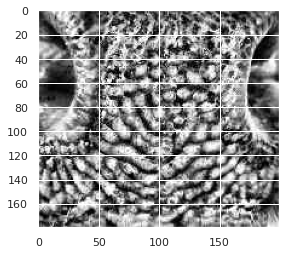

(180, 200)

In [ ]:
# Convert image to grayscale. The second argument in the following step is cv2.COLOR_BGR2GRAY, which converts colour image to grayscale.
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print('Original Image:')
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()
gray.shape

In [ ]:
import numpy as np
data = np.array(gray)
flattened = data.flatten()
print(flattened.shape)
flattened

(36000,)


array([ 30,  55,  79, ..., 222, 237, 253], dtype=uint8)

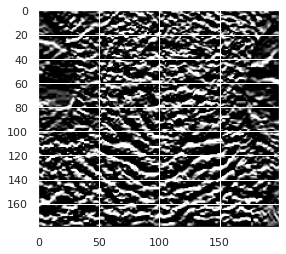

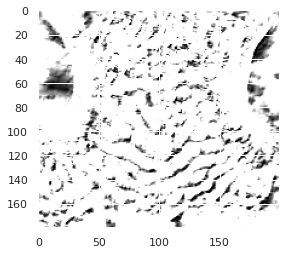

In [ ]:
# 3x3 array for edge detection
mat_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
mat_x = np.array([[ -1, 0, 1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
  
filtered_image = cv2.filter2D(gray, -1, mat_y)
plt.imshow(filtered_image, cmap='gray')
plt.show()
filtered_image = cv2.filter2D(gray, -1, mat_x)
plt.imshow(filtered_image, cmap='gray')

#Get layers in cnn model

In [ ]:
from keras.models import model_from_json
from tensorflow.keras.optimizers import SGD,Adam
import glob

json_file = open('/content/gdrive/My Drive/pantech_solution/models/muzzle_feature_7oct.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("/content/gdrive/My Drive/pantech_solution/models/muzzle_feature_weight_7oct.h5")

#get the layers in model

layer_names = [layer.name for layer in model.layers]
layer_names

['conv2d',
 'max_pooling2d',
 'conv2d_1',
 'max_pooling2d_1',
 'conv2d_2',
 'max_pooling2d_2',
 'flatten',
 'dense',
 'dense_1',
 'dense_2']

#checking layers

In [ ]:
model.layers
layer_outputs = [layer.output for layer in model.layers]
layer_outputs

[<KerasTensor: shape=(None, 148, 148, 8) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 74, 74, 8) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 74, 74, 16) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 37, 37, 16) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 37, 37, 32) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 18, 18, 32) dtype=float32 (created by layer 'max_pooling2d_2')>,
 <KerasTensor: shape=(None, 10368) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'dense_1')>,
 <KerasTensor: shape=(None, 18) dtype=float32 (created by layer 'dense_2')>]

#note here is that we have total 10 outputs, 9 intermediate outputs and 1 final classification output. Hence, we will have 9 feature maps.

---



Feature maps visualization Model from CNN Layers

---



In [ ]:
import tensorflow as tf

feature_map_model = tf.keras.models.Model(model.input,layer_outputs)
#print(model.input)

#read image and get ready to feed as input to the model for feature visualisation

In [ ]:
import tensorflow as tf

'''
image1 = tf.io.read_file(image_path)
image1 = tf.image.decode_jpeg(image1, channels=3)
image1 = tf.image.resize(image, [128,128])
#image = tf.image.resize(image, [240,240])
img = tf.expand_dims(image1, axis=0) 
'''
#image_path= r"path of the image from desktop or internet."
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))  
input = tf.keras.preprocessing.image.img_to_array(img)                           
input = input.reshape((1,) + input.shape)                   
input /= 255.0

#generate feature map

In [ ]:
feature_maps = feature_map_model.predict(input)

#check the shape of the feature maps of each of the outputs

In [ ]:
conv_feature_layers=0
for layer_name, feature_map in zip(layer_names, feature_maps):
  print(f"The shape of the {layer_name} is =======>> {feature_map.shape}")
  print(feature_map.shape)
  if len(feature_map.shape)==4:
    conv_feature_layers=conv_feature_layers+1

print("total conv_feature_layers are  :",conv_feature_layers)    

The shape of the conv2d is =======>> (1, 148, 148, 8)
(1, 148, 148, 8)
The shape of the max_pooling2d is =======>> (1, 74, 74, 8)
(1, 74, 74, 8)
The shape of the conv2d_1 is =======>> (1, 74, 74, 16)
(1, 74, 74, 16)
The shape of the max_pooling2d_1 is =======>> (1, 37, 37, 16)
(1, 37, 37, 16)
The shape of the conv2d_2 is =======>> (1, 37, 37, 32)
(1, 37, 37, 32)
The shape of the max_pooling2d_2 is =======>> (1, 18, 18, 32)
(1, 18, 18, 32)
The shape of the flatten is =======>> (1, 10368)
(1, 10368)
The shape of the dense is =======>> (1, 1024)
(1, 1024)
The shape of the dense_1 is =======>> (1, 512)
(1, 512)
The shape of the dense_2 is =======>> (1, 18)
(1, 18)
total conv_feature_layers are  : 6


# generate feature maps of layers that have “dimension=4″

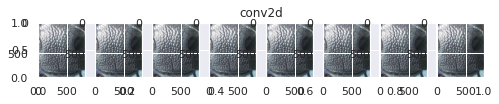

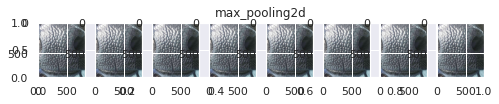

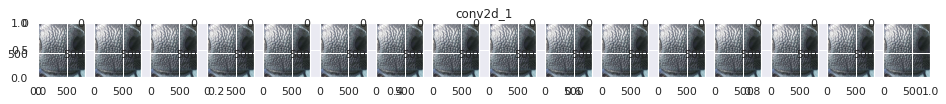

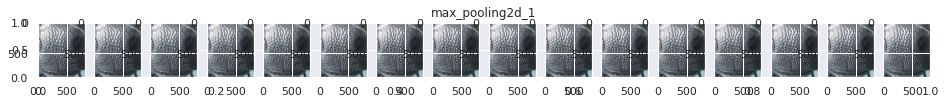

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


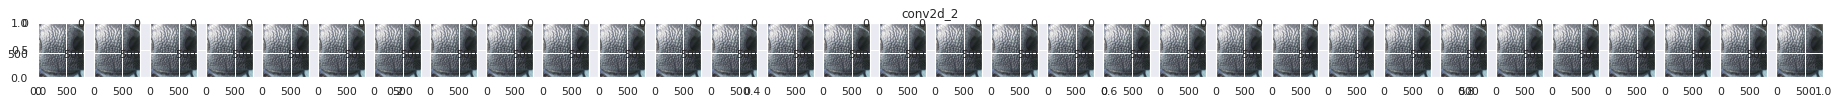

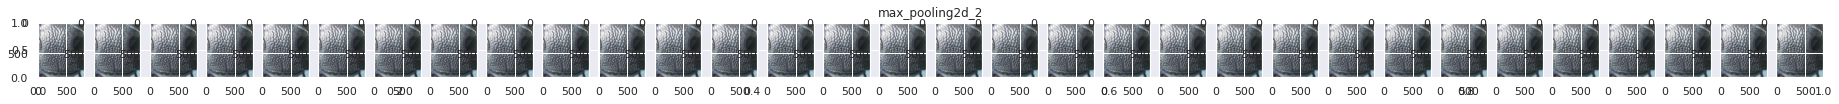

"\n\n# plot all 64 maps in an 8x8 squares\nsquare = 8\nix = 1\nfor _ in range(square):\n\tfor _ in range(square):\n\t\t# specify subplot and turn of axis\n\t\tax = pyplot.subplot(square, square, ix)\n\t\tax.set_xticks([])\n\t\tax.set_yticks([])\n\t\t# plot filter channel in grayscale\n\t\tpyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')\n\t\tix += 1\n# show the figure\npyplot.show()\n"

In [ ]:
import numpy as np

'''
for layer_name, feature_map in zip(layer_names, feature_maps): 
  if len(feature_map.shape) == 4  :# Number of feature images/dimensions in a feature map of a layer 
     k = feature_map.shape[-1]  
  
    #iterating over a feature map of a particular layer to separate all feature images.   
     for i in range(k):
       feature_image = feature_map[0, :, :, i]
       feature_image-= feature_image.mean()
       feature_image/= feature_image.std ()
       feature_image*=  64
       feature_image+= 128
       feature_image= np.clip(image, 0, 255).astype('uint8')
#image_belt=[]
'''
for layer_name, feature_map in zip(layer_names, feature_maps): 
 # for i in range(conv_feature_layers):
    if len(feature_map.shape) == 4:
      k = feature_map.shape[-1]  
      size=feature_map.shape[1]
   
      fig = plt.figure(figsize=(k, 1))
      plt.title (layer_name )
      for i in range(k):
       # print(k)
        feature_image = feature_map[0, :, :, i]
        feature_image-= feature_image.mean()
        feature_image/= feature_image.std ()
      #  print(feature_image)
        feature_image*= 64
        feature_image+= 128
        feature_image= np.clip(image, 0, 255).astype('uint8')
        #image_belt[:, i * size : (i + 1) * size] = feature_image   
       # feature_map[:, i * size : (i + 1) * size] = feature_image   
       # scale = 20. / k
       # plt.figure( figsize=(scale * k, scale) )        
      #  plt.grid  ( False )
       # plt.imshow( feature_image, aspect='auto')  
        fig.add_subplot(1,k, i+1)
        plt.imshow(feature_image,aspect='auto')  
        #plt.imshow( image_belt, aspect='auto') 
       # plt.show()   
      plt.show()
'''

# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()
'''    